In [1]:
a = (177.38540649414062, 133.53125, 551.3854064941406, 436.53125)


In [22]:
from PIL import Image, ImageFilter,ImageDraw
import numpy as np

In [32]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)

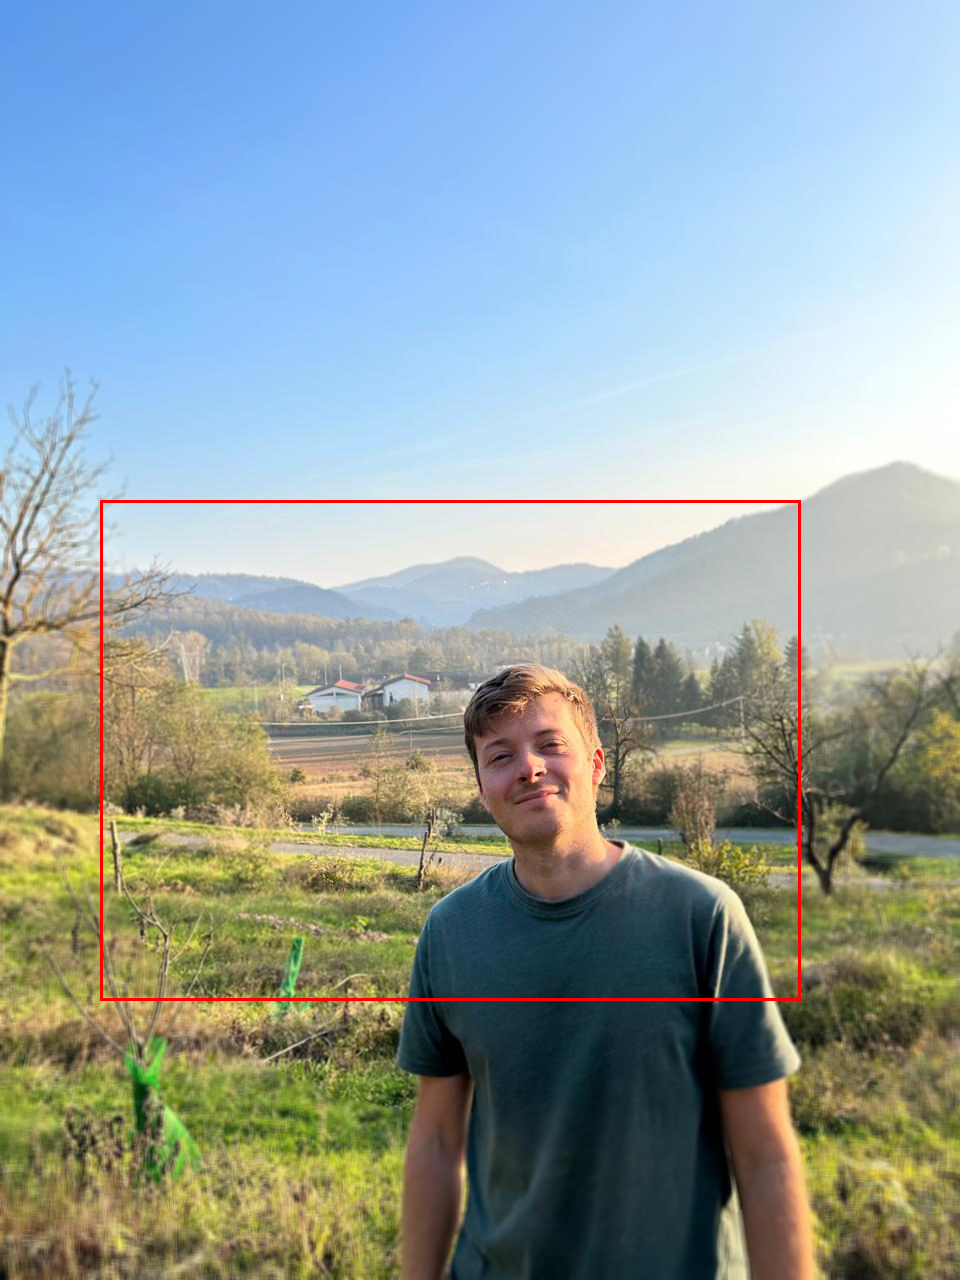

In [31]:
p = "C:\\Users\\brian\\OneDrive\\Pictures\\pp.jpeg"
image = Image.open(p)
width, height = image.size

# Step 2: Define the box region (e.g., top-left and bottom-right corners)
box_top_left = (100, 500)  # x, y of top-left
box_bottom_right = (800, 1000)  # x, y of bottom-right

# Step 3: Create a distance-based blur mask
mask = np.zeros((height, width), dtype=np.float32)

box_center_x = (box_top_left[0] + box_bottom_right[0]) // 2
box_center_y = (box_top_left[1] + box_bottom_right[1]) // 2

# Compute distance from the center of the box
for y in range(height):
    for x in range(width):
        distance = np.sqrt((x - box_center_x)**2 + (y - box_center_y)**2)
        mask[y, x] = distance

# Normalize the mask to a range suitable for blur radii
max_blur_radius = 5  # Adjust this value for stronger/weaker blur
mask = (mask / mask.max()) * max_blur_radius

# Step 4: Apply a blur based on the mask
blurred_image = image.copy()

# Loop through the image pixels
for y in range(height):
    for x in range(width):
        # Get blur radius for the current pixel
        radius = int(mask[y, x])
        
        # Define crop bounds (ensure they're within the image)
        left = max(0, x - radius)
        upper = max(0, y - radius)
        right = min(width, x + radius + 1)
        lower = min(height, y + radius + 1)
        
        # Crop and apply blur
        cropped = image.crop((left, upper, right, lower))
        blurred_cropped = cropped.filter(ImageFilter.GaussianBlur(radius=radius))
        
        # Safely determine the center of the cropped region
        center_x = (blurred_cropped.size[0] - 1) // 2
        center_y = (blurred_cropped.size[1] - 1) // 2
        
        # Get the pixel value from the center of the blurred crop
        pixel_value = blurred_cropped.getpixel((center_x, center_y))
        blurred_image.putpixel((x, y), pixel_value)

# Step 5: Draw the box on the blurred image
draw = ImageDraw.Draw(blurred_image)
draw.rectangle([box_top_left, box_bottom_right], outline="red", width=3)

# Step 6: Show or save the final image
blurred_image